## Waste Management Classification using CNN Model


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Define paths for train and test datasets
train_path = "DATASET/TRAIN" 
test_path = "DATASET/TEST"

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [ ]:
x_data = []
y_data = []
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
# Create a DataFrame from the image data (x_data) and labels (y_data) to organize the dataset

data = pd.DataFrame({'image':x_data,"label":y_data})

100%|██████████| 9999/9999 [01:58<00:00, 84.57it/s]


In [8]:
# Display the shape of the DataFrame
data.shape

(22564, 2)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Augmentation for real-time data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values between 0 and 1
    rotation_range=30,  # Random rotations
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Random shearing
    zoom_range=0.2,  # Random zooms
    horizontal_flip=True,  # Random horizontal flip
    fill_mode='nearest'  # Pixel filling when applying transformations
)

# Flow images in batches from the training directory
train_data_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    class_mode='binary',  # Assuming binary classification
    shuffle=True
)


Found 22564 images belonging to 2 classes.


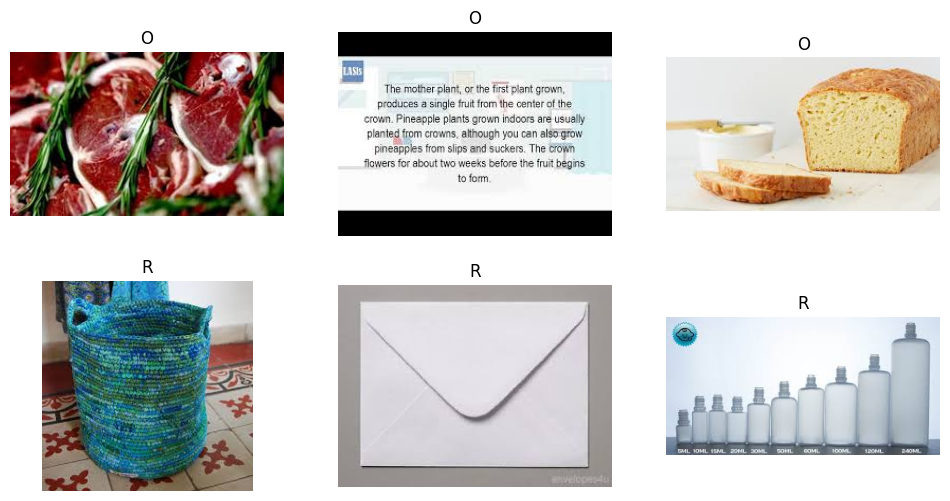

In [17]:
import matplotlib.pyplot as plt
import random
import os

# Visualize a few sample images from each class
def display_samples():
    classes = os.listdir(train_path)
    plt.figure(figsize=(12, 6))
    
    for i, class_name in enumerate(classes):
        class_folder = os.path.join(train_path, class_name)
        image_files = os.listdir(class_folder)
        
        # Randomly pick 3 images from the class
        sample_images = random.sample(image_files, 3)
        
        for j, image_file in enumerate(sample_images):
            img_path = os.path.join(class_folder, image_file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            plt.subplot(len(classes), 3, i * 3 + j + 1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'{class_name}')
    
    plt.show()

display_samples()


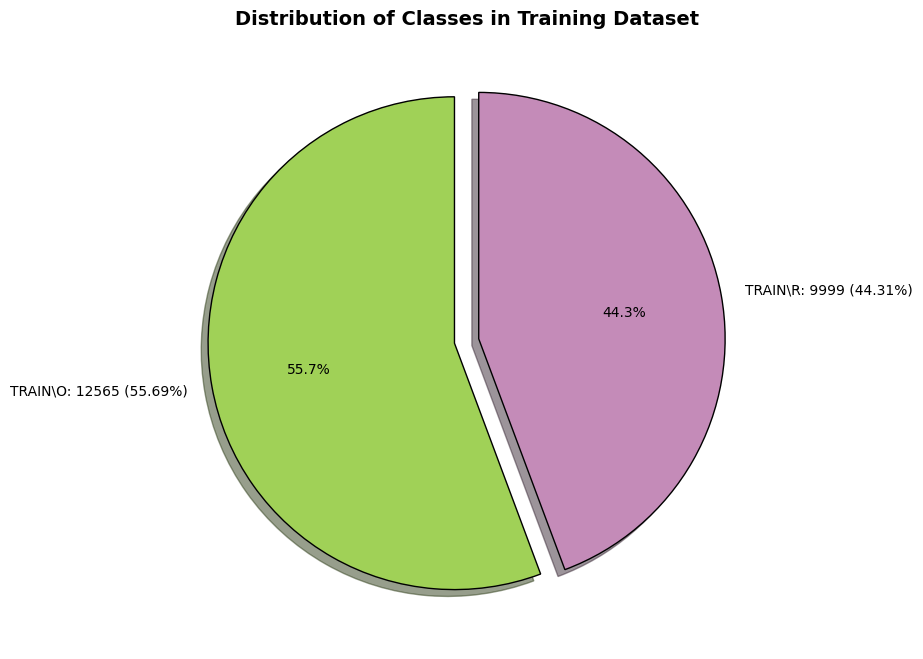

In [16]:
# Pie chart visualization with additional customizations

# Define custom colors for the pie chart
colors = ["#a0d157", "#c48bb8"]

# Create a figure with adjusted size for better readability
plt.figure(figsize=(8, 8))

# Pie chart with additional label formatting, count and percentage display
label_counts = data.label.value_counts()  # Get the count of each class

plt.pie(label_counts, 
        labels=[f"{label}: {count} ({percent:.2f}%)" for label, count, percent in zip(label_counts.index, label_counts, 100 * label_counts / len(data))],
        autopct='%1.1f%%',  # Format the percentage display to one decimal place
        colors=colors,
        startangle=90,
        explode=[0.05, 0.05],  # Slightly "explode" the segments for emphasis
        shadow=True,  # Add shadow effect for better visualization
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid'}  # Customize border for clarity
       )

# Title for the pie chart
plt.title("Distribution of Classes in Training Dataset", fontsize=14, fontweight='bold')

# Show the pie chart
plt.show()